In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dist_ct_arb = pd.read_pickle("./logs/dist/dist_log_ct_arb.pickle")
dist_ct_real = pd.read_pickle("./logs/dist/dist_log_ct_real.pickle")

dist_ut_arb = pd.read_pickle("./logs/dist/dist_log_ut_arb.pickle")
dist_ut_real = pd.read_pickle("./logs/dist/dist_log_ut_real.pickle")

dist_lmd_arb = pd.read_pickle("./logs/dist/dist_log_lmd_arb.pickle")
dist_lmd_real = pd.read_pickle("./logs/dist/dist_log_lmd_real.pickle")

night_ct_arb = pd.read_pickle("./logs/night/night_log_ct_arb.pickle")
night_ct_real = pd.read_pickle("./logs/night/night_log_ct_real.pickle")

night_ut_arb = pd.read_pickle("./logs/night/night_log_ut_arb.pickle")
night_ut_real = pd.read_pickle("./logs/night/night_log_ut_real.pickle")

night_lmd_arb = pd.read_pickle("./logs/night/night_log_lmd_arb.pickle")
night_lmd_real = pd.read_pickle("./logs/night/night_log_lmd_real.pickle")

dumb_ct_arb = pd.read_pickle("./logs/dumb/dumb_ct_arb.pickle")
dumb_ct_real = pd.read_pickle("./logs/dumb/dumb_ct_real.pickle")

dumb_ut_arb = pd.read_pickle("./logs/dumb/dumb_ut_arb.pickle")
dumb_ut_real = pd.read_pickle("./logs/dumb/dumb_ut_real.pickle")

dumb_lmd_arb = pd.read_pickle("./logs/dumb/dumb_lmd_arb.pickle")
dumb_lmd_real = pd.read_pickle("./logs/dumb/dumb_lmd_real.pickle")

lin_ct_arb = pd.read_pickle("./logs/lin/ct_arb_lin_log.pickle")
lin_ct_real = pd.read_pickle("./logs/lin/ct_real_lin_log.pickle")

lin_ut_arb = pd.read_pickle("./logs/lin/ut_arb_lin_log.pickle")
lin_ut_real = pd.read_pickle("./logs/lin/ut_real_lin_log.pickle")

lin_lmd_arb = pd.read_pickle("./logs/lin/lmd_arb_lin_log.pickle")
lin_lmd_real = pd.read_pickle("./logs/lin/lmd_real_lin_log.pickle")

rl_ct_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_ct_arb.pickle")
rl_ct_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_ct_real.pickle")

rl_ut_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_ut_arb.pickle")
rl_ut_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_ut_real.pickle")

rl_lmd_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_lmd_arb.pickle")
rl_lmd_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_lmd_real.pickle")

In [3]:
for i in range(dist_ct_arb.__len__()):
    dist_ct_arb.loc[i, "hour_id"] = (dist_ct_arb.loc[i, "Time"].hour + dist_ct_arb.loc[i, "Time"].minute / 60)
    dist_ut_arb.loc[i, "hour_id"] = (dist_ut_arb.loc[i, "Time"].hour + dist_ut_arb.loc[i, "Time"].minute / 60)
    dist_lmd_arb.loc[i, "hour_id"] = (dist_lmd_arb.loc[i, "Time"].hour + dist_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_dist_ct_arb = dist_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_ut_arb = dist_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_lmd_arb = dist_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dist_ct_arb = []
mean_all_dist_ut_arb = []
mean_all_dist_lmd_arb = []

for i in range(mean_per_hid_dist_ct_arb.__len__()):
    mean_all_dist_ct_arb.append(np.mean(mean_per_hid_dist_ct_arb[i]))
    mean_all_dist_ut_arb.append(np.mean(mean_per_hid_dist_ut_arb[i]))
    mean_all_dist_lmd_arb.append(np.mean(mean_per_hid_dist_lmd_arb[i]))

mean_dist_ct_arb = pd.DataFrame()
mean_dist_ut_arb = pd.DataFrame()
mean_dist_lmd_arb = pd.DataFrame()

mean_dist_ct_arb["Distributed charging"] = np.multiply(mean_all_dist_ct_arb, 4)
mean_dist_ut_arb["Distributed charging"] = np.multiply(mean_all_dist_ut_arb, 4)
mean_dist_lmd_arb["Distributed charging"] = np.multiply(mean_all_dist_lmd_arb, 4)

for i in range(dist_ct_real.__len__()):
    dist_ct_real.loc[i, "hour_id"] = (dist_ct_real.loc[i, "Time"].hour + dist_ct_real.loc[i, "Time"].minute / 60)
    dist_ut_real.loc[i, "hour_id"] = (dist_ut_real.loc[i, "Time"].hour + dist_ut_real.loc[i, "Time"].minute / 60)
    dist_lmd_real.loc[i, "hour_id"] = (dist_lmd_real.loc[i, "Time"].hour + dist_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_dist_ct_real = dist_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_ut_real = dist_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_lmd_real = dist_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dist_ct_real = []
mean_all_dist_ut_real = []
mean_all_dist_lmd_real = []

for i in range(mean_per_hid_dist_ct_real.__len__()):
    mean_all_dist_ct_real.append(np.mean(mean_per_hid_dist_ct_real[i]))
    mean_all_dist_ut_real.append(np.mean(mean_per_hid_dist_ut_real[i]))
    mean_all_dist_lmd_real.append(np.mean(mean_per_hid_dist_lmd_real[i]))

mean_dist_ct_real = pd.DataFrame()
mean_dist_ut_real = pd.DataFrame()
mean_dist_lmd_real = pd.DataFrame()

mean_dist_ct_real["Distributed charging"] = np.multiply(mean_all_dist_ct_real, 4)
mean_dist_ut_real["Distributed charging"] = np.multiply(mean_all_dist_ut_real, 4)
mean_dist_lmd_real["Distributed charging"] = np.multiply(mean_all_dist_lmd_real, 4)


In [4]:
real_power_night = []
for i in range(night_ct_arb.__len__()):
    night_ct_arb.loc[i, "hour_id"] = (night_ct_arb.loc[i, "Time"].hour + night_ct_arb.loc[i, "Time"].minute / 60)
    night_ut_arb.loc[i, "hour_id"] = (night_ut_arb.loc[i, "Time"].hour + night_ut_arb.loc[i, "Time"].minute / 60)
    night_lmd_arb.loc[i, "hour_id"] = (night_lmd_arb.loc[i, "Time"].hour + night_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_night_ct_arb = night_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_ut_arb = night_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_lmd_arb = night_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_night_ct_arb = []
mean_all_night_ut_arb = []
mean_all_night_lmd_arb = []

for i in range(mean_per_hid_night_ct_arb.__len__()):
    mean_all_night_ct_arb.append(np.mean(mean_per_hid_night_ct_arb[i]))
    mean_all_night_ut_arb.append(np.mean(mean_per_hid_night_ut_arb[i]))
    mean_all_night_lmd_arb.append(np.mean(mean_per_hid_night_lmd_arb[i]))

mean_night_ct_arb = pd.DataFrame()
mean_night_ut_arb = pd.DataFrame()
mean_night_lmd_arb = pd.DataFrame()

mean_night_ct_arb["night charging"] = np.multiply(mean_all_night_ct_arb, 4)
mean_night_ut_arb["night charging"] = np.multiply(mean_all_night_ut_arb, 4)
mean_night_lmd_arb["night charging"] = np.multiply(mean_all_night_lmd_arb, 4)


for i in range(night_ct_real.__len__()):
    night_ct_real.loc[i, "hour_id"] = (night_ct_real.loc[i, "Time"].hour + night_ct_real.loc[i, "Time"].minute / 60)
    night_ut_real.loc[i, "hour_id"] = (night_ut_real.loc[i, "Time"].hour + night_ut_real.loc[i, "Time"].minute / 60)
    night_lmd_real.loc[i, "hour_id"] = (night_lmd_real.loc[i, "Time"].hour + night_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_night_ct_real = night_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_ut_real = night_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_lmd_real = night_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_night_ct_real = []
mean_all_night_ut_real = []
mean_all_night_lmd_real = []

for i in range(mean_per_hid_night_ct_real.__len__()):
    mean_all_night_ct_real.append(np.mean(mean_per_hid_night_ct_real[i]))
    mean_all_night_ut_real.append(np.mean(mean_per_hid_night_ut_real[i]))
    mean_all_night_lmd_real.append(np.mean(mean_per_hid_night_lmd_real[i]))

mean_night_ct_real = pd.DataFrame()
mean_night_ut_real = pd.DataFrame()
mean_night_lmd_real = pd.DataFrame()

mean_night_ct_real["night charging"] = np.multiply(mean_all_night_ct_real, 4)
mean_night_ut_real["night charging"] = np.multiply(mean_all_night_ut_real, 4)
mean_night_lmd_real["night charging"] = np.multiply(mean_all_night_lmd_real, 4)

In [5]:
for i in range(dumb_ct_arb.__len__()):
    dumb_ct_arb.loc[i, "hour_id"] = (dumb_ct_arb.loc[i, "Time"].hour + dumb_ct_arb.loc[i, "Time"].minute / 60)
    dumb_ut_arb.loc[i, "hour_id"] = (dumb_ut_arb.loc[i, "Time"].hour + dumb_ut_arb.loc[i, "Time"].minute / 60)
    dumb_lmd_arb.loc[i, "hour_id"] = (dumb_lmd_arb.loc[i, "Time"].hour + dumb_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_dumb_ct_arb = dumb_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_ut_arb = dumb_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_lmd_arb = dumb_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dumb_ct_arb = []
mean_all_dumb_ut_arb = []
mean_all_dumb_lmd_arb = []

for i in range(mean_per_hid_dumb_ct_arb.__len__()):
    mean_all_dumb_ct_arb.append(np.mean(mean_per_hid_dumb_ct_arb[i]))
    mean_all_dumb_ut_arb.append(np.mean(mean_per_hid_dumb_ut_arb[i]))
    mean_all_dumb_lmd_arb.append(np.mean(mean_per_hid_dumb_lmd_arb[i]))

mean_dumb_ct_arb = pd.DataFrame()
mean_dumb_ut_arb = pd.DataFrame()
mean_dumb_lmd_arb = pd.DataFrame()

mean_dumb_ct_arb["dumb charging"] = np.multiply(mean_all_dumb_ct_arb, 4)
mean_dumb_ut_arb["dumb charging"] = np.multiply(mean_all_dumb_ut_arb, 4)
mean_dumb_lmd_arb["dumb charging"] = np.multiply(mean_all_dumb_lmd_arb, 4)

for i in range(dumb_ct_real.__len__()):
    dumb_ct_real.loc[i, "hour_id"] = (dumb_ct_real.loc[i, "Time"].hour + dumb_ct_real.loc[i, "Time"].minute / 60)
    dumb_ut_real.loc[i, "hour_id"] = (dumb_ut_real.loc[i, "Time"].hour + dumb_ut_real.loc[i, "Time"].minute / 60)
    dumb_lmd_real.loc[i, "hour_id"] = (dumb_lmd_real.loc[i, "Time"].hour + dumb_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_dumb_ct_real = dumb_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_ut_real = dumb_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_lmd_real = dumb_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dumb_ct_real = []
mean_all_dumb_ut_real = []
mean_all_dumb_lmd_real = []

for i in range(mean_per_hid_dumb_ct_real.__len__()):
    mean_all_dumb_ct_real.append(np.mean(mean_per_hid_dumb_ct_real[i]))
    mean_all_dumb_ut_real.append(np.mean(mean_per_hid_dumb_ut_real[i]))
    mean_all_dumb_lmd_real.append(np.mean(mean_per_hid_dumb_lmd_real[i]))

mean_dumb_ct_real = pd.DataFrame()
mean_dumb_ut_real = pd.DataFrame()
mean_dumb_lmd_real = pd.DataFrame()

mean_dumb_ct_real["dumb charging"] = np.multiply(mean_all_dumb_ct_real, 4)
mean_dumb_ut_real["dumb charging"] = np.multiply(mean_all_dumb_ut_real, 4)
mean_dumb_lmd_real["dumb charging"] = np.multiply(mean_all_dumb_lmd_real, 4)

In [6]:
for i in range(lin_ct_arb.__len__()):
    lin_ct_arb.loc[i, "hour_id"] = (lin_ct_arb.loc[i, "Time"].hour + lin_ct_arb.loc[i, "Time"].minute / 60)
    lin_ut_arb.loc[i, "hour_id"] = (lin_ut_arb.loc[i, "Time"].hour + lin_ut_arb.loc[i, "Time"].minute / 60)
    lin_lmd_arb.loc[i, "hour_id"] = (lin_lmd_arb.loc[i, "Time"].hour + lin_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_lin_ct_arb = lin_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_ut_arb = lin_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_lmd_arb = lin_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_lin_ct_arb = []
mean_all_lin_ut_arb = []
mean_all_lin_lmd_arb = []

for i in range(mean_per_hid_lin_ct_arb.__len__()):
    mean_all_lin_ct_arb.append(np.mean(mean_per_hid_lin_ct_arb[i]))
    mean_all_lin_ut_arb.append(np.mean(mean_per_hid_lin_ut_arb[i]))
    mean_all_lin_lmd_arb.append(np.mean(mean_per_hid_lin_lmd_arb[i]))

mean_lin_ct_arb = pd.DataFrame()
mean_lin_ut_arb = pd.DataFrame()
mean_lin_lmd_arb = pd.DataFrame()

mean_lin_ct_arb["lin charging"] = np.multiply(mean_all_lin_ct_arb, 4)
mean_lin_ut_arb["lin charging"] = np.multiply(mean_all_lin_ut_arb, 4)
mean_lin_lmd_arb["lin charging"] = np.multiply(mean_all_lin_lmd_arb, 4)

In [7]:
for i in range(lin_ct_real.__len__()):
    lin_ct_real.loc[i, "hour_id"] = (lin_ct_real.loc[i, "Time"].hour + lin_ct_real.loc[i, "Time"].minute / 60)
    lin_ut_real.loc[i, "hour_id"] = (lin_ut_real.loc[i, "Time"].hour + lin_ut_real.loc[i, "Time"].minute / 60)
    lin_lmd_real.loc[i, "hour_id"] = (lin_lmd_real.loc[i, "Time"].hour + lin_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_lin_ct_real = lin_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_ut_real = lin_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_lmd_real = lin_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_lin_ct_real = []
mean_all_lin_ut_real = []
mean_all_lin_lmd_real = []

for i in range(mean_per_hid_lin_ct_real.__len__()):
    mean_all_lin_ct_real.append(np.mean(mean_per_hid_lin_ct_real[i]))
    mean_all_lin_ut_real.append(np.mean(mean_per_hid_lin_ut_real[i]))
    mean_all_lin_lmd_real.append(np.mean(mean_per_hid_lin_lmd_real[i]))

mean_lin_ct_real = pd.DataFrame()
mean_lin_ut_real = pd.DataFrame()
mean_lin_lmd_real = pd.DataFrame()

mean_lin_ct_real["lin charging"] = np.multiply(mean_all_lin_ct_real, 4)
mean_lin_ut_real["lin charging"] = np.multiply(mean_all_lin_ut_real, 4)
mean_lin_lmd_real["lin charging"] = np.multiply(mean_all_lin_lmd_real, 4)

In [8]:
for i in range(rl_ct_arb.__len__()):
    rl_ct_arb.loc[i, "hour_id"] = (rl_ct_arb.loc[i, "Time"].hour + rl_ct_arb.loc[i, "Time"].minute / 60)
    rl_ut_arb.loc[i, "hour_id"] = (rl_ut_arb.loc[i, "Time"].hour + rl_ut_arb.loc[i, "Time"].minute / 60)
    rl_lmd_arb.loc[i, "hour_id"] = (rl_lmd_arb.loc[i, "Time"].hour + rl_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_rl_ct_arb = rl_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_ut_arb = rl_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_lmd_arb = rl_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_rl_ct_arb = []
mean_all_rl_ut_arb = []
mean_all_rl_lmd_arb = []

for i in range(mean_per_hid_rl_ct_arb.__len__()):
    mean_all_rl_ct_arb.append(np.mean(mean_per_hid_rl_ct_arb[i]))
    mean_all_rl_ut_arb.append(np.mean(mean_per_hid_rl_ut_arb[i]))
    mean_all_rl_lmd_arb.append(np.mean(mean_per_hid_rl_lmd_arb[i]))

mean_rl_ct_arb = pd.DataFrame()
mean_rl_ut_arb = pd.DataFrame()
mean_rl_lmd_arb = pd.DataFrame()

mean_rl_ct_arb["rl charging"] = np.multiply(mean_all_rl_ct_arb, 4)
mean_rl_ut_arb["rl charging"] = np.multiply(mean_all_rl_ut_arb, 4)
mean_rl_lmd_arb["rl charging"] = np.multiply(mean_all_rl_lmd_arb, 4)

In [9]:
for i in range(rl_ct_real.__len__()):
    rl_ct_real.loc[i, "hour_id"] = (rl_ct_real.loc[i, "Time"].hour + rl_ct_real.loc[i, "Time"].minute / 60)
    rl_ut_real.loc[i, "hour_id"] = (rl_ut_real.loc[i, "Time"].hour + rl_ut_real.loc[i, "Time"].minute / 60)
    rl_lmd_real.loc[i, "hour_id"] = (rl_lmd_real.loc[i, "Time"].hour + rl_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_rl_ct_real = rl_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_ut_real = rl_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_lmd_real = rl_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_rl_ct_real = []
mean_all_rl_ut_real = []
mean_all_rl_lmd_real = []

for i in range(mean_per_hid_rl_ct_real.__len__()):
    mean_all_rl_ct_real.append(np.mean(mean_per_hid_rl_ct_real[i]))
    mean_all_rl_ut_real.append(np.mean(mean_per_hid_rl_ut_real[i]))
    mean_all_rl_lmd_real.append(np.mean(mean_per_hid_rl_lmd_real[i]))

mean_rl_ct_real = pd.DataFrame()
mean_rl_ut_real = pd.DataFrame()
mean_rl_lmd_real = pd.DataFrame()

mean_rl_ct_real["rl charging"] = np.multiply(mean_all_rl_ct_real, 4)
mean_rl_ut_real["rl charging"] = np.multiply(mean_all_rl_ut_real, 4)
mean_rl_lmd_real["rl charging"] = np.multiply(mean_all_rl_lmd_real, 4)

In [ ]:
(fig, ax) = plt.subplots(3,2, figsize=(8,8))  # Changed subplot arrangement to 3 rows and 2 columns





# First plot
mean_dumb_ct_arb.plot(ax = ax[0,0])
mean_dumb_ut_arb.plot(ax = ax[0,0])
mean_dumb_lmd_arb.plot(ax = ax[0,0])

ax[0,0].legend(["CT", "UT", "LMD"])
ax[0,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,0].grid(alpha=0.2)
ax[0,0].set_ylabel("Charging power in kW")
ax[0,0].set_ylim([0, 11])
ax[0,0].set_title("Dumb charging")


# Second plot
mean_dist_ct_arb.plot(ax = ax[0,1], legend=False)
mean_dist_ut_arb.plot(ax = ax[0,1], legend=False)
mean_dist_lmd_arb.plot(ax = ax[0,1], legend=False)

ax[0,1].legend(["CT", "UT", "LMD"], loc="upper left")
ax[0,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,1].grid(alpha=0.2)
ax[0,1].set_ylabel("Charging power in kW")
ax[0,1].set_ylim([0, 11])
ax[0,1].set_title("Distributed charging")


# Third plot
mean_lin_ct_arb.plot(ax = ax[1,0], legend=False)
mean_lin_ut_arb.plot(ax = ax[1,0], legend=False)
mean_lin_lmd_arb.plot(ax = ax[1,0], legend=False)

#ax[1,0].legend(["CT", "UT", "LMD"])
ax[1,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,0].grid(alpha=0.2)
ax[1,0].set_ylabel("Charging power in kW")
ax[1,0].set_ylim([-7, 7])
ax[1,0].set_title("LP arbitrage")


# Fourth plot
mean_lin_ct_real.plot(ax = ax[1,1], legend=False)
mean_lin_ut_real.plot(ax = ax[1,1], legend=False)
mean_lin_lmd_real.plot(ax = ax[1,1], legend=False)

#ax[1,1].legend(["CT", "UT", "LMD"])
ax[1,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,1].grid(alpha=0.2)
ax[1,1].set_ylabel("Charging power in kW")
ax[1,1].set_ylim([-7, 7])
ax[1,1].set_title("LP realistic")


# Fifth plot
mean_rl_ct_arb.plot(ax = ax[2,0], legend=False)
mean_rl_ut_arb.plot(ax = ax[2,0], legend=False)
mean_rl_lmd_arb.plot(ax = ax[2,0], legend=False)

#ax[2,0].legend(["CT", "UT", "LMD"])
ax[2,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[2,0].grid(alpha=0.2)
ax[2,0].set_ylabel("Charging power in kW")
ax[2,0].set_ylim([-15, 15])
ax[2,0].set_title("RL arbitrage")


# Sixth plot
mean_rl_ct_real.plot(ax = ax[2,1], legend=False)
mean_rl_ut_real.plot(ax = ax[2,1], legend=False)
mean_rl_lmd_real.plot(ax = ax[2,1], legend=False)

#ax[2,1].legend(["CT", "UT", "LMD"])
ax[2,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[2,1].grid(alpha=0.2)
ax[2,1].set_ylabel("Charging power in kW")
ax[2,1].set_ylim([-15, 15])
ax[2,1].set_title("RL realistic")


plt.tight_layout()
plt.show()


In [ ]:
(fig, ax) = plt.subplots(2,2, figsize=(8,8))  # Changed subplot arrangement to 3 rows and 2 columns

# Third plot
mean_lin_ct_arb.plot(ax = ax[0,0], legend=False)
mean_lin_ut_arb.plot(ax = ax[0,0], legend=False)
mean_lin_lmd_arb.plot(ax = ax[0,0], legend=False)

ax[0,0].legend(["CT", "UT", "LMD"])
ax[0,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,0].grid(alpha=0.2)
ax[0,0].set_ylabel("Charging power in kW")
ax[0,0].set_ylim([-7, 7])
ax[0,0].set_title("LP arbitrage")


# Fourth plot
mean_lin_ct_real.plot(ax = ax[0,1], legend=False)
mean_lin_ut_real.plot(ax = ax[0,1], legend=False)
mean_lin_lmd_real.plot(ax = ax[0,1], legend=False)

ax[0,1].legend(["CT", "UT", "LMD"])
ax[0,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,1].grid(alpha=0.2)
ax[0,1].set_ylabel("Charging power in kW")
ax[0,1].set_ylim([-7, 7])
ax[0,1].set_title("LP realistic")


# Fifth plot
mean_rl_ct_arb.plot(ax = ax[1,0], legend=False)
mean_rl_ut_arb.plot(ax = ax[1,0], legend=False)
mean_rl_lmd_arb.plot(ax = ax[1,0], legend=False)

#ax[2,0].legend(["CT", "UT", "LMD"])
ax[1,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,0].grid(alpha=0.2)
ax[1,0].set_ylabel("Charging power in kW")
ax[1,0].set_ylim([-15, 15])
ax[1,0].set_title("RL arbitrage")


# Sixth plot
mean_rl_ct_real.plot(ax = ax[1,1], legend=False)
mean_rl_ut_real.plot(ax = ax[1,1], legend=False)
mean_rl_lmd_real.plot(ax = ax[1,1], legend=False)

#ax[2,1].legend(["CT", "UT", "LMD"])
ax[1,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,1].grid(alpha=0.2)
ax[1,1].set_ylabel("Charging power in kW")
ax[1,1].set_ylim([-15, 15])
ax[1,1].set_title("RL realistic")


plt.tight_layout()
plt.show()


In [17]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

cashflow_comp_ct = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "RL", "LP"] * 2,
    'Case': ['Arbitrage']*5 + ['Realistic']*5,
    'Cashflow': [
        dumb_ct_arb["Cashflow"].sum() + (min_missing - dumb_ct_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        dist_ct_arb["Cashflow"].sum() + (min_missing - dist_ct_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        night_ct_arb["Cashflow"].sum() + (min_missing - night_ct_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        rl_ct_arb["Cashflow"].sum() + (min_missing - rl_ct_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        lin_ct_arb["Cashflow"].sum() + (min_missing - lin_ct_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        dumb_ct_real["Cashflow"].sum() + (min_missing - dumb_ct_real["SOC violation"].sum()) * 60 * avg_price/1000,
        dist_ct_real["Cashflow"].sum() + (min_missing - dist_ct_real["SOC violation"].sum()) * 60 * avg_price/1000,
        night_ct_real["Cashflow"].sum() + (min_missing - night_ct_real["SOC violation"].sum()) * 60 * avg_price/1000,
        rl_ct_real["Cashflow"].sum() + (min_missing - rl_ct_real["SOC violation"].sum()) * 60 * avg_price/1000,
        lin_ct_real["Cashflow"].sum() + (min_missing - lin_ct_real["SOC violation"].sum()) * 60 * avg_price/1000
    ]
})


In [18]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

cashflow_comp_ut = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "RL", "LP"] * 2,
    'Case': ['Arbitrage']*5 + ['Realistic']*5,
    'Cashflow': [
        dumb_ut_arb["Cashflow"].sum() + (min_missing - dumb_ut_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        dist_ut_arb["Cashflow"].sum() + (min_missing - dist_ut_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        night_ut_arb["Cashflow"].sum() + (min_missing - night_ut_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        rl_ut_arb["Cashflow"].sum() + (min_missing - rl_ut_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        lin_ut_arb["Cashflow"].sum() + (min_missing - lin_ut_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        dumb_ut_real["Cashflow"].sum() + (min_missing - dumb_ut_real["SOC violation"].sum()) * 60 * avg_price/1000,
        dist_ut_real["Cashflow"].sum() + (min_missing - dist_ut_real["SOC violation"].sum()) * 60 * avg_price/1000,
        night_ut_real["Cashflow"].sum() + (min_missing - night_ut_real["SOC violation"].sum()) * 60 * avg_price/1000,
        rl_ut_real["Cashflow"].sum() + (min_missing - rl_ut_real["SOC violation"].sum()) * 60 * avg_price/1000,
        lin_ut_real["Cashflow"].sum() + (min_missing - lin_ut_real["SOC violation"].sum()) * 60 * avg_price/1000
    ]
})

In [19]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

cashflow_comp_lmd = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "RL", "LP"] * 2,
    'Case': ['Arbitrage']*5 + ['Realistic']*5,
    'Cashflow': [
        dumb_lmd_arb["Cashflow"].sum() + (min_missing - dumb_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        dist_lmd_arb["Cashflow"].sum() + (min_missing - dist_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        night_lmd_arb["Cashflow"].sum() + (min_missing - night_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        rl_lmd_arb["Cashflow"].sum() + (min_missing - rl_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        lin_lmd_arb["Cashflow"].sum() + (min_missing - lin_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        dumb_lmd_real["Cashflow"].sum() + (min_missing - dumb_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000,
        dist_lmd_real["Cashflow"].sum() + (min_missing - dist_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000,
        night_lmd_real["Cashflow"].sum() + (min_missing - night_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000,
        rl_lmd_real["Cashflow"].sum() + (min_missing - rl_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000,
        lin_lmd_real["Cashflow"].sum() + (min_missing - lin_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000
    ]
})

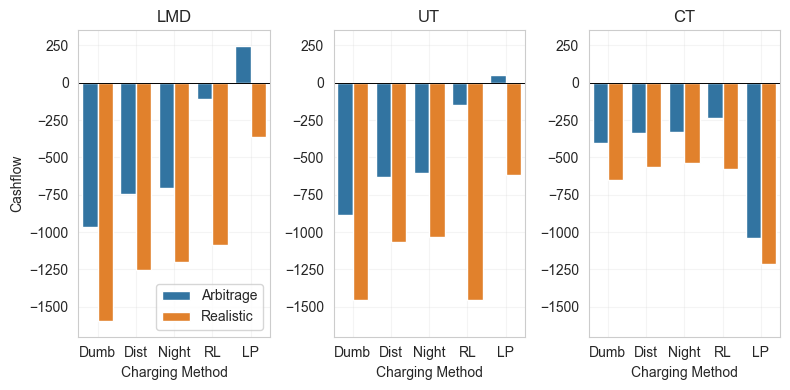

In [20]:
(fig, ax) = plt.subplots(1,3, figsize=(8,4))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_lmd, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ut, ax=ax[1])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ct, ax=ax[2])

ax[0].set_ylim([-1700, 350])
ax[0].grid(alpha=0.2)
ax[0].legend(loc="lower right")
ax[0].title.set_text("LMD")
ax[0].axhline(0, color='black', linewidth=0.7)



ax[1].set_ylim([-1700, 350])
ax[1].grid(alpha=0.2)
ax[1].get_legend().remove()
ax[1].set_ylabel("")
ax[1].title.set_text("UT")
ax[1].axhline(0, color='black', linewidth=0.7)

#ax[1].set_yticklabels("")
ax[2].set_ylim([-1700, 350])
ax[2].grid(alpha=0.2)
ax[2].get_legend().remove()
ax[2].set_ylabel("")
ax[2].title.set_text("CT")
ax[2].axhline(0, color='black', linewidth=0.7)


plt.tight_layout()
plt.savefig("test.pdf")
plt.show()

In [25]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]
rl_arb = rl_lmd_arb["Cashflow"].sum() + (min_missing - rl_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000
rl_real = rl_lmd_real["Cashflow"].sum() + (min_missing - rl_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000


rel_cashflow_comp_lmd = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "LP"] * 2,
    'Case': ['Arbitrage'] * 4 + ['Realistic'] * 4,
    'Cashflow': [
        rl_arb - (dumb_lmd_arb["Cashflow"].sum() + (min_missing - dumb_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (dist_lmd_arb["Cashflow"].sum() + (min_missing - dist_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (night_lmd_arb["Cashflow"].sum() + (min_missing - night_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (lin_lmd_arb["Cashflow"].sum() + (min_missing - lin_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (dumb_lmd_real["Cashflow"].sum() + (min_missing - dumb_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (dist_lmd_real["Cashflow"].sum() + (min_missing - dist_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (night_lmd_real["Cashflow"].sum() + (
                    min_missing - night_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (lin_lmd_real["Cashflow"].sum() + (min_missing - lin_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000)
    ]
})

In [35]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

rl_arb = rl_ut_arb["Cashflow"].sum() + (min_missing - rl_ut_arb["SOC violation"].sum()) * 60 * avg_price / 1000

rl_real = rl_ut_real["Cashflow"].sum() + (min_missing - rl_ut_real["SOC violation"].sum()) * 60 * avg_price / 1000


rel_cashflow_comp_ut = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "LP"] * 2,
    'Case': ['Arbitrage'] * 4 + ['Realistic'] * 4,
    'Cashflow': [
        rl_arb - (dumb_ut_arb["Cashflow"].sum() + (min_missing - dumb_ut_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (dist_ut_arb["Cashflow"].sum() + (min_missing - dist_ut_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (night_ut_arb["Cashflow"].sum() + (min_missing - night_ut_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (lin_ut_arb["Cashflow"].sum() + (min_missing - lin_ut_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        (rl_real - (dumb_ut_real["Cashflow"].sum() + (min_missing - dumb_ut_real["SOC violation"].sum()) * 60 * avg_price / 1000))*30,
        rl_real - (dist_ut_real["Cashflow"].sum() + (min_missing - dist_ut_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (night_ut_real["Cashflow"].sum() + (min_missing - night_ut_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (lin_ut_real["Cashflow"].sum() + (min_missing - lin_ut_real["SOC violation"].sum()) * 60 * avg_price / 1000)
    ]
})

In [27]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

rl_arb = rl_ct_arb["Cashflow"].sum() + (min_missing - rl_ct_arb["SOC violation"].sum()) * 60 * avg_price / 1000
rl_real = rl_ct_real["Cashflow"].sum() + (min_missing - rl_ct_real["SOC violation"].sum()) * 60 * avg_price / 1000


rel_cashflow_comp_ct = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "LP"] * 2,
    'Case': ['Arbitrage'] * 4 + ['Realistic'] * 4,
    'Cashflow': [
        rl_arb - (dumb_ct_arb["Cashflow"].sum() + (min_missing - dumb_ct_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (dist_ct_arb["Cashflow"].sum() + (min_missing - dist_ct_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (night_ct_arb["Cashflow"].sum() + (min_missing - night_ct_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (lin_ct_arb["Cashflow"].sum() + (min_missing - lin_ct_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (dumb_ct_real["Cashflow"].sum() + (min_missing - dumb_ct_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (dist_ct_real["Cashflow"].sum() + (min_missing - dist_ct_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (night_ct_real["Cashflow"].sum() + (min_missing - night_ct_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (lin_ct_real["Cashflow"].sum() + (min_missing - lin_ct_real["SOC violation"].sum()) * 60 * avg_price / 1000)
    ]
})

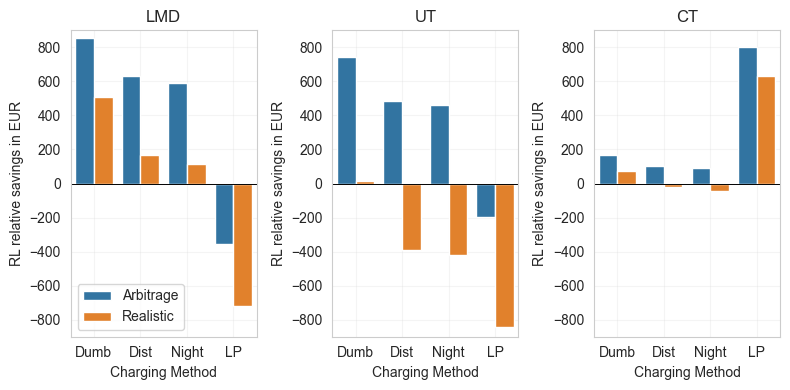

In [43]:
(fig, ax) = plt.subplots(1,3, figsize=(8,4))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_lmd, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_ut, ax=ax[1])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_ct, ax=ax[2])

ax[0].set_ylim([-900, 900])
ax[0].grid(alpha=0.2)
ax[0].legend(loc="lower left")
ax[0].title.set_text("LMD")
ax[0].axhline(0, color='black', linewidth=0.7)
ax[0].set_ylabel("RL relative savings in EUR")

ax[1].set_ylim([-900, 900])
ax[1].grid(alpha=0.2)
ax[1].get_legend().remove()
ax[1].set_ylabel("")
ax[1].title.set_text("UT")
ax[1].axhline(0, color='black', linewidth=0.7)
ax[1].set_ylabel("RL relative savings in EUR")


#ax[1].set_yticklabels("")
ax[2].set_ylim([-900, 900])
ax[2].grid(alpha=0.2)
ax[2].get_legend().remove()
ax[2].set_ylabel("")
ax[2].title.set_text("CT")
ax[2].axhline(0, color='black', linewidth=0.7)
ax[2].set_ylabel("RL relative savings in EUR")


plt.tight_layout()
plt.savefig("rel_test.pdf")
plt.show()